<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4 
Esquivel Ovilla José Aarón 

In [1]:
#primero importamos las bibliotecas que necesitaremos 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url="https://raw.githubusercontent.com/JoseAaronE/FisicaComputacional/master/Actividad1/Estacion3016datos.txt"

#aplicamos todas las intrucciones del ejercicio anterior 

columnas=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"]

df_dist = pd.read_csv(url, names=columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

"hacemos la copia del trabajo"
df_cop0= df_dist.copy()

#reemplazamos donde dice nulo para que salga en blanco 
str_Nulo= "Nulo"
df_cop1 = df_cop0.replace(to_replace=str_Nulo, value='', regex=True)

#convertimos a numeros flotantes los valores de las variables 
cols_list = ["PRECIP", "EVAP", "TMAX", "TMIN"]
for cols in cols_list:
  df_cop1[cols] = pd.to_numeric(df_cop1[cols], errors='coerce')

#hacemos otra copia del archivo
df_cop2 = df_cop1.copy()

df_cop2["FECHA"]=pd.to_datetime(df_cop2["FECHA"], dayfirst=True).copy()

df_cop2['Año'] = df_cop2['FECHA'].dt.year
df_cop2['Mes'] = df_cop2['FECHA'].dt.month

df_meteo = df_cop2.copy()
#eliminamos las columnas de mes que es están como numeros y las cambiaremos por caracteres
df_meteo.drop("Mes", axis=1, inplace=True)
df_meteo["Mes"] = df_meteo["FECHA"].dt.strftime("%b")
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   27166 non-null  datetime64[ns]
 1   PRECIP  27163 non-null  float64       
 2   EVAP    0 non-null      float64       
 3   TMAX    26481 non-null  float64       
 4   TMIN    26480 non-null  float64       
 5   Año     27166 non-null  int64         
 6   Mes     27166 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB
       FECHA  PRECIP  EVAP  TMAX  TMIN   Año  Mes
0 1941-07-10     0.0   NaN  41.0   NaN  1941  Jul
1 1941-07-11     0.0   NaN  42.0  24.0  1941  Jul
2 1941-07-12     0.0   NaN  41.0  31.0  1941  Jul
3 1941-07-13     0.0   NaN  39.0  28.0  1941  Jul
4 1941-07-14     0.0   NaN  39.0  27.0  1941  Jul


# Histogramas de las variables Precipitación, Evaporación, Temperaturas Máxima y Mínima 

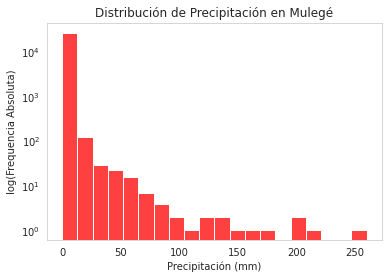

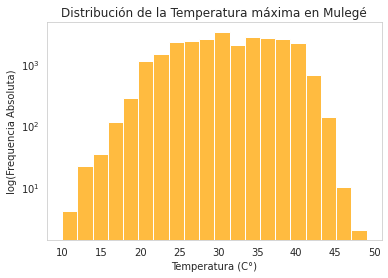

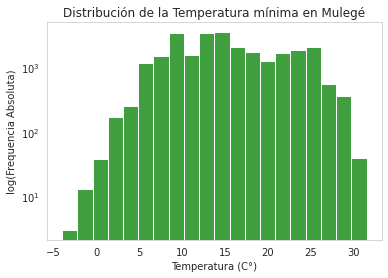

In [2]:
#varialbe Precipitación
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Mulegé')
sns.histplot(data=df_meteo, x='PRECIP', bins=20, log_scale=(False,True),color="red");
plt.grid()
plt.show()

#variable evaporación
#Como no disponemos datos de la variable evaporación, no podemos gráficar 

#variable temperatura máxima 
sns.set_style("whitegrid")
plt.xlabel('Temperatura (C°)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de la Temperatura máxima en Mulegé')
sns.histplot(data=df_meteo, x='TMAX', bins=20, log_scale=(False,True),color="orange");
plt.grid()
plt.show()

#variable temperatura mínima
sns.set_style("whitegrid")
plt.xlabel('Temperatura (C°)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de la Temperatura mínima en Mulegé')
sns.histplot(data=df_meteo, x='TMIN', bins=20, log_scale=(False,True),color="green");
plt.grid()
plt.show()

función de densidad de probabilidad

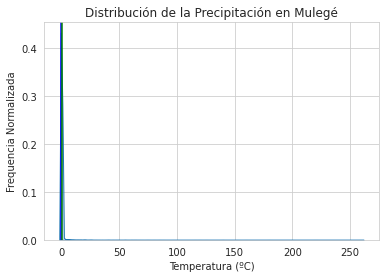

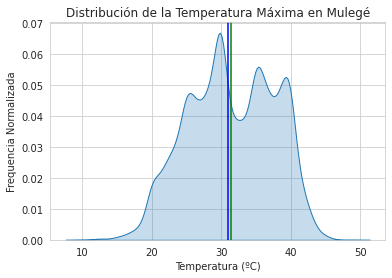

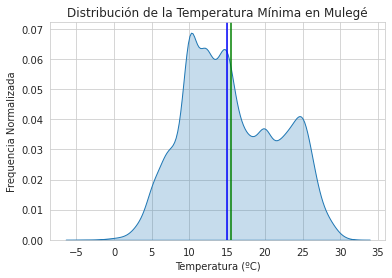

In [3]:
#variable Precipitación 
Tmed = df_meteo.PRECIP.median() 
Tprom = df_meteo.PRECIP.mean()

sns.set_style("whitegrid")
sns.kdeplot(df_meteo.PRECIP, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Mulegé')
plt.show()

#variable Temperatura Máxima 
# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.TMAX.median() 
Tprom = df_meteo.TMAX.mean()

sns.set_style("whitegrid")
sns.kdeplot(df_meteo.TMAX, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Mulegé')
plt.show()

#varialbe de Temperatura Mínima
Tmed = df_meteo.TMIN.median() 
Tprom = df_meteo.TMIN.mean()

sns.set_style("whitegrid")
sns.kdeplot(df_meteo.TMIN, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Mulegé')
plt.show()


# Punto 3
 Crear las gráficas de cajas para la Evaporación, Temperaturas Máxima y Mínima

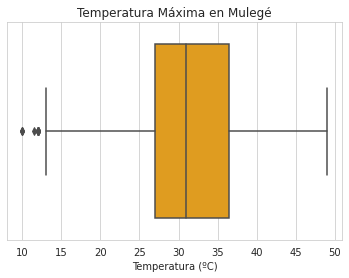

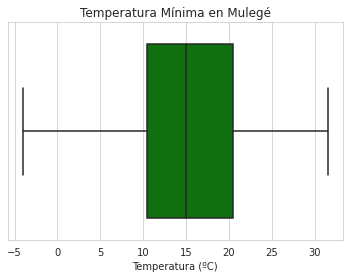

In [4]:
#como no tenemos ningún dato sobre la evaporación (NAN) no se podrá gráficar los datos 
 
#Usamos el comando sns.boxplot()
#Variable Temperatura Máxima
sns.set_style("whitegrid")
sns.boxplot(x=df_meteo.TMAX, data=df_meteo, orient='h',color="orange").set(xlabel='Temperatura (ºC)', 
                                                   title='Temperatura Máxima en Mulegé');
plt.show()
#Gráfica de la variable Temperatura Mímina 
sns.set_style("whitegrid")
sns.boxplot(x=df_meteo.TMIN, data=df_meteo, orient='h',color="green").set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en Mulegé');
plt.show()


Punto 4
gráficas de barras para Precipitación agrupado por Años y después por meses

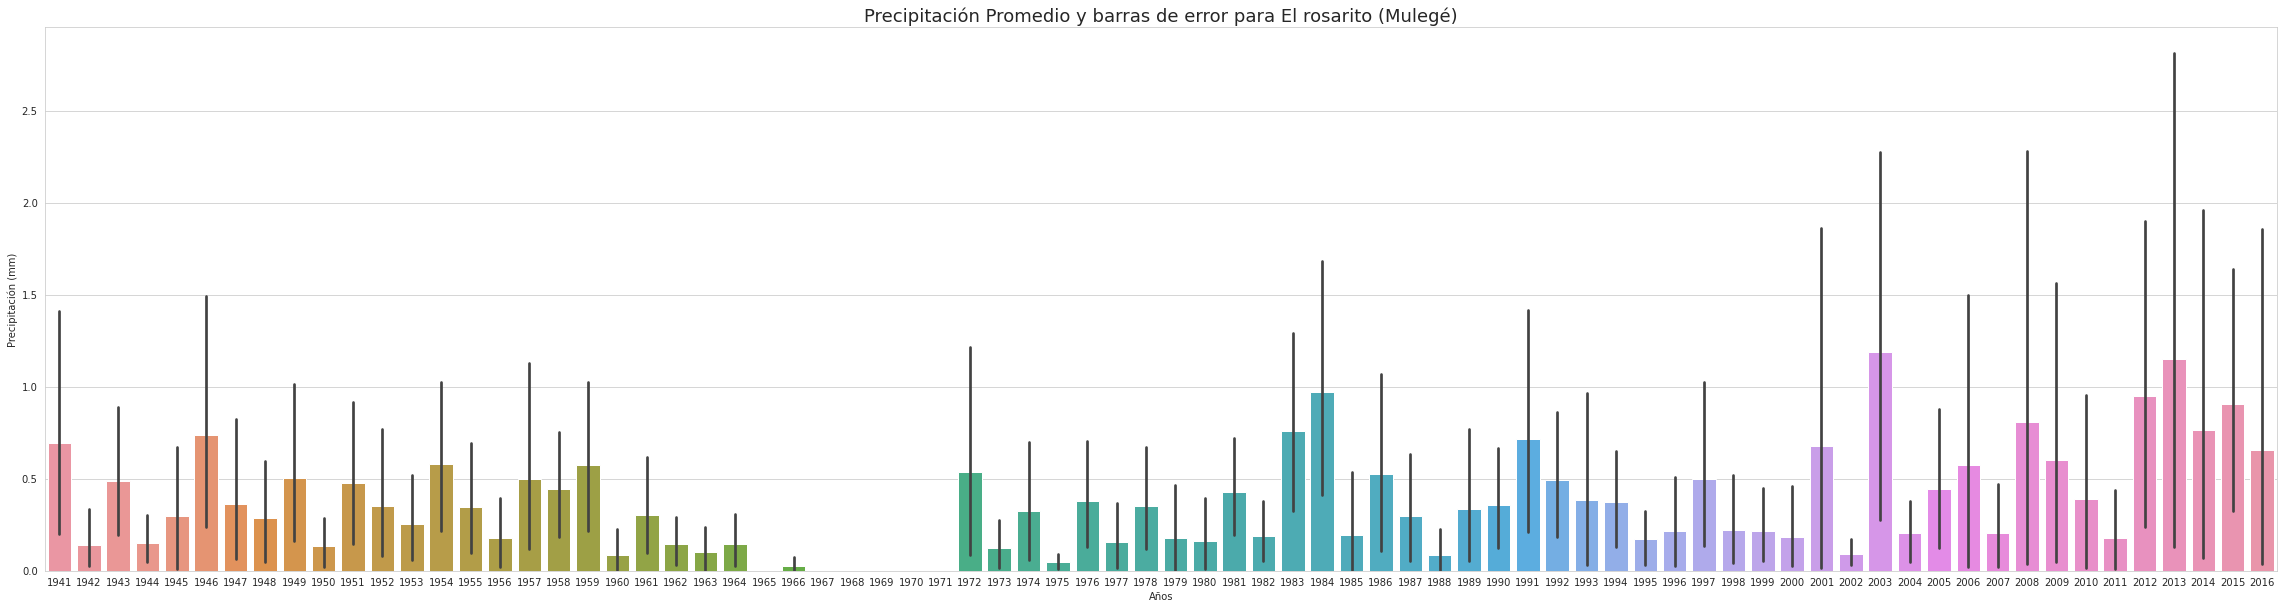

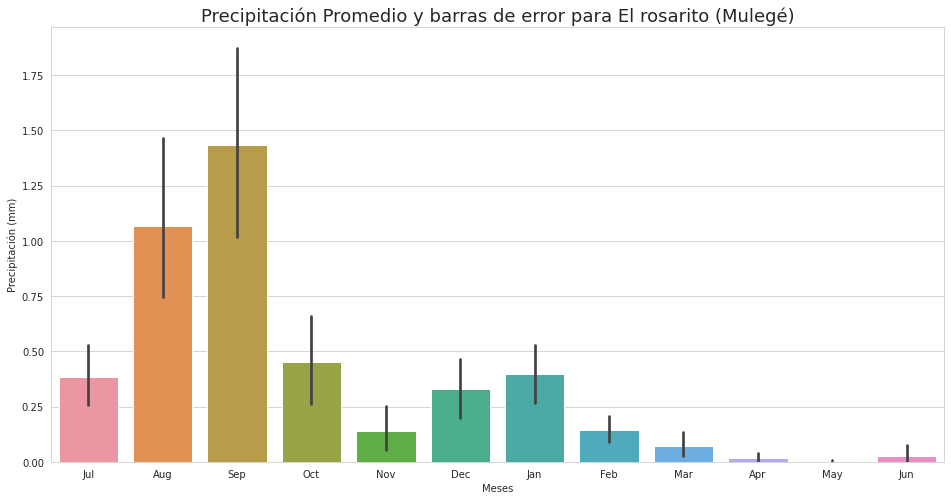

In [ ]:
#usamos el comando sns.barplot()
#gráfica de Precipitación agrupados por años 
df_76 = df_meteo[(df_meteo['Año'] >= 1941) & (df_meteo['Año'] < 2017)]
sns.set_style('whitegrid')
plt.figure(figsize=(40,10))
g=sns.barplot(x='Año', y='PRECIP', data=df_76);
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para El rosarito (Mulegé)', fontsize=18)
plt.show()

#gráica de Precipitación agrupados por meses 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='PRECIP', data=df_76);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para El rosarito (Mulegé)', fontsize=18)
plt.show()


Punto 5 
colección de los últimos 30 años de datos

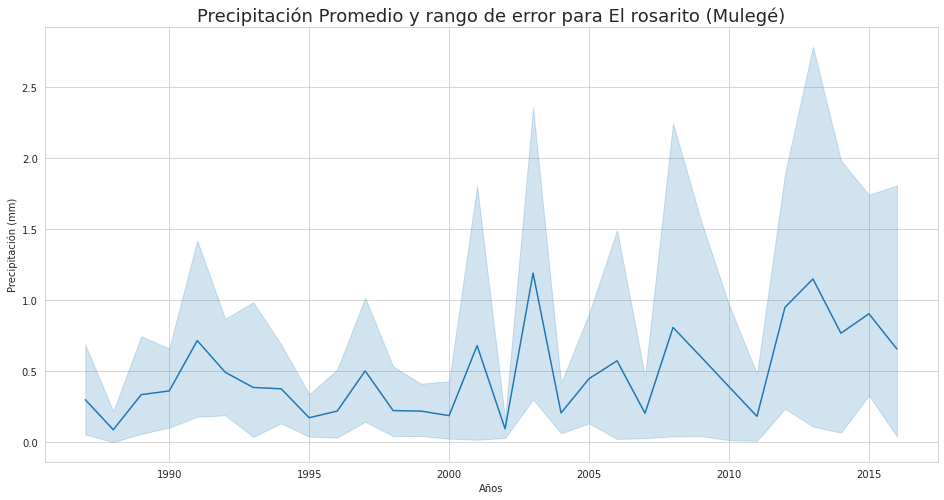

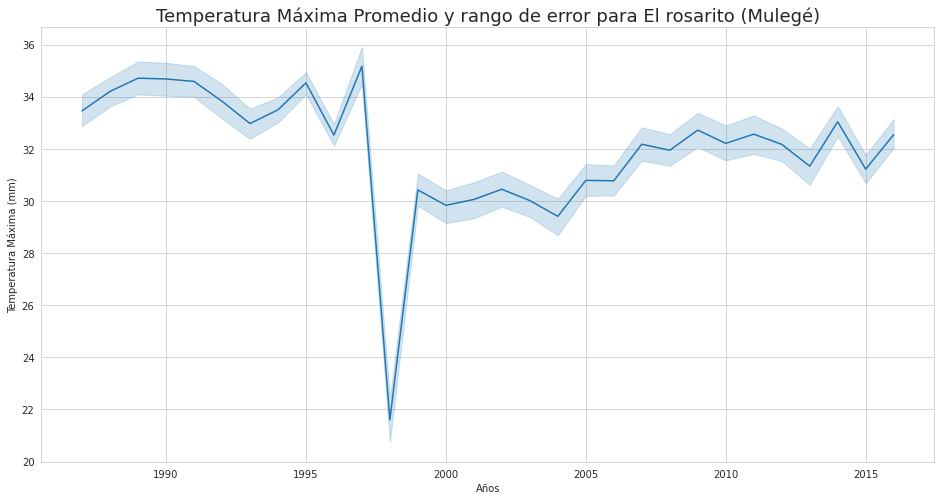

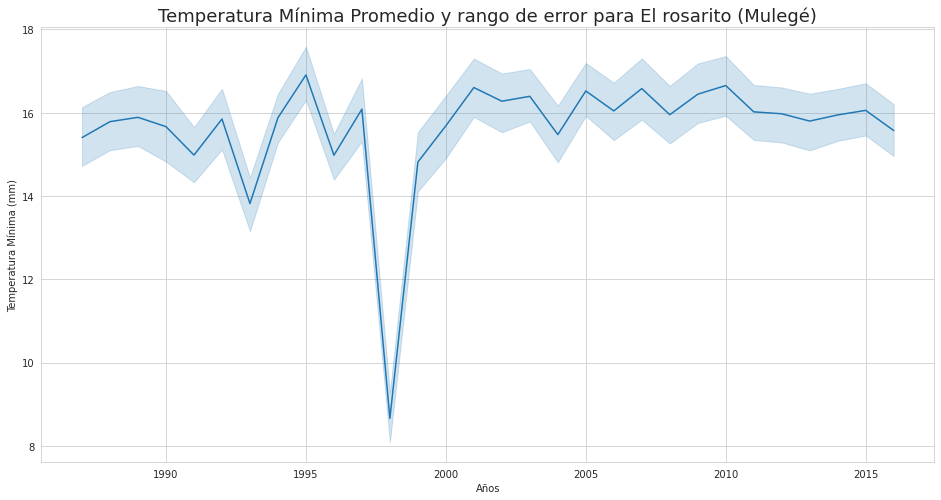

In [ ]:
#Últimos 30 años de datos de los datos del data frame 
df_30 = df_meteo[(df_meteo['Año'] >= 1987) & (df_meteo['Año'] < 2017)]
#gráficamos los últimos 30 años de los datos de Precipitación 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='PRECIP', data=df_30);
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para El rosarito (Mulegé)', fontsize=18)
plt.show()

#Últimos 30 años de datos de los datos de Temperatura Máxima 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='TMAX', data=df_30);
plt.xlabel('Años')
plt.ylabel('Temperatura Máxima (mm)')
plt.title('Temperatura Máxima Promedio y rango de error para El rosarito (Mulegé)', fontsize=18)
plt.show()

#Últimos 30 años de datos de los datos de Temperatura Mínima 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='TMIN', data=df_30);
plt.xlabel('Años')
plt.ylabel('Temperatura Mínima (mm)')
plt.title('Temperatura Mínima Promedio y rango de error para El rosarito (Mulegé)', fontsize=18)
plt.show()


Punto 6

Con el conjunto de 30 años de datos, produzca diagramas de cajas para Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.

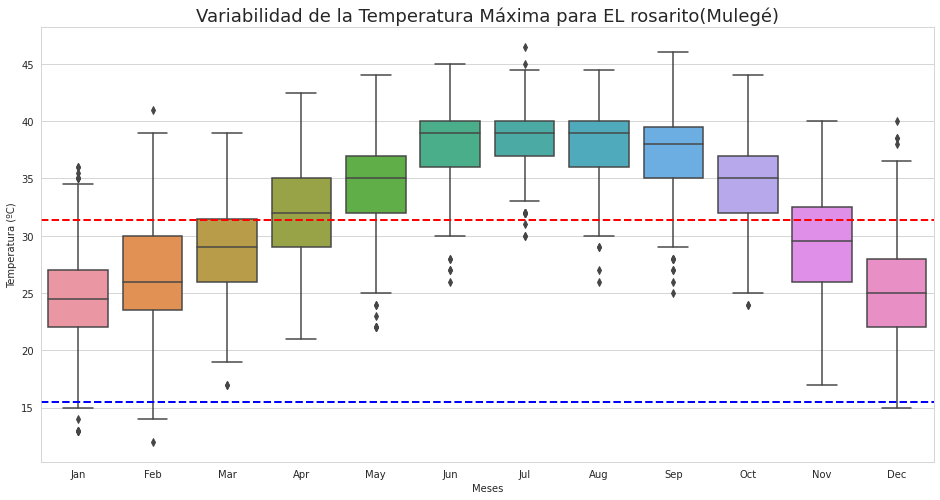

mean(TMAX) =  31.41326233903553
mean(TMIN) =  15.51060422960725
Diff TMAX_ave-TMIN_ave =  15.90265810942828


In [ ]:
#Últimos 30 años de datos y gráfica de la temperatura máxima 
df_30 = df_meteo[(df_meteo['Año'] >= 1987) & (df_meteo['Año'] < 2017)]
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

TMAX_ave = df_meteo.TMAX.mean()
TMIN_ave = df_meteo.TMIN.mean()
#hacemos la gráfica de cajas 
g=sns.boxplot(x='Mes', y='TMAX', data=df_30);
#linea promedio de la temperatura máxima 
plt.axhline(TMAX_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(TMIN_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para EL rosarito(Mulegé)', fontsize=18)
plt.show()

#imprimimos la información sobre las temperatura máximas y mínimas 
print('mean(TMAX) = ', TMAX_ave)
print('mean(TMIN) = ', TMIN_ave)
print('Diff TMAX_ave-TMIN_ave = ', (TMAX_ave - TMIN_ave))

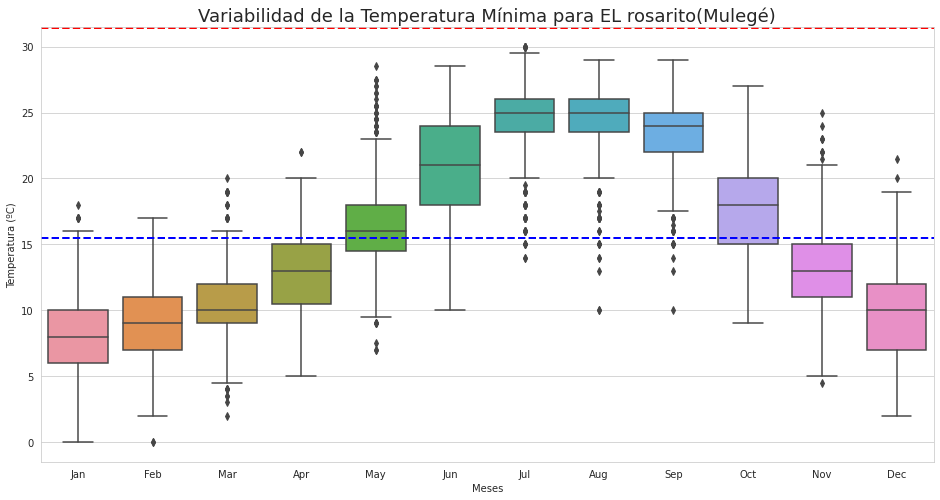

mean(TMAX) =  31.41326233903553
mean(TMIN) =  15.51060422960725
Diff TMAX_ave-TMIN_ave =  15.90265810942828


In [ ]:
#gráfica de los últimos 30 años para la temperatura mínima 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

TMAX_ave = df_meteo.TMAX.mean()
TMIN_ave = df_meteo.TMIN.mean()
#hacemos la gráfica de cajas 
g=sns.boxplot(x='Mes', y='TMIN', data=df_30);
#linea promedio de la temperatura máxima 
plt.axhline(TMAX_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(TMIN_ave, color = 'b', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para EL rosarito(Mulegé)', fontsize=18)
plt.show()

#imprimimos la información sobre las temperatura máximas y mínimas 
print('mean(TMAX) = ', TMAX_ave)
print('mean(TMIN) = ', TMIN_ave)
print('Diff TMAX_ave-TMIN_ave = ', (TMAX_ave - TMIN_ave))